In [51]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from os.path import join
from numpy import genfromtxt
from plots import _plot
from train import Results

In [56]:
exp='exp class synthetic'
if exp=='exp reg synthetic':
    #folder = 'exps/exp1/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'fista\', \'subgd\', \'ssubgd\']ist[\'fista\', \'subgd\', \'ssubgd\']n10val_perc0.0-2019-01-31 13:23:14.322002'
    #folder = 'exps77/grid_searchexp1w_bar4taskstd1y_snr10dim30over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-11 12:37:04.184427'
    folder = 'exps77/exp_duality_gap_MAC/exp1/'
    T=500
    x_right=500
elif exp =='exp class synthetic':
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n50val_perc0.0-2019-02-08 22%3a00%3a35.758740'
    #folder = 'exps77/grid_searchexp2w_bar4taskstd1y_snr10dim30y_distlogisticmarginover10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n10val_perc0.0-2019-02-08 11%3a16%3a06.897500'
    folder = 'exps77/exp_duality_gap_MAC/exp2/'
    T=500
    x_right=500
elif exp =='lenk regression':
    #folder = 'exps77/grid_searchexpLenkRegn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 14:48:50.964294/'
    folder = 'exps77/exp_duality_gap_MAC/expLenkReg/'
    T=100
    x_right=100
elif exp =='lenk classification':
    #folder = 'exps77/grid_searchexpLenkn_tasks_train100n_tasks_val40n_tasks180dim14over10seedsis[\'ssubgd\', \'fista\']ist[\'ssubgd\', \'fista\']n8val_perc0.0-2019-02-07 18:54:20.948679'
    folder = 'exps77/exp_duality_gap_MAC/expLenkClass/'
    T=100
    x_right=100

title=''
metric='accuracy'
y_label='Test Error'
save=True
save_dir = 'plotsf'

if not save:
    save_dir=None

files = os.listdir(folder)
def get_file(starts_with):
    for f in files:
        if f.startswith(metric+'-'+starts_with):
            return genfromtxt(join(folder, f), delimiter=',')
    return None
result_dict = {}
def put_in_dict(starts_with, name, color=None):
    metrics = {'': get_file(starts_with=starts_with)}
    print(metrics)
    r = Results(None, False, False, name=name)
    r.add_metrics(metrics)
    r.color = color
    result_dict[name] = r

In [57]:
erm_alg='fista'
put_in_dict('ITL-ts'+erm_alg, 'ITL ERM', 'black')
put_in_dict('ITL-tsssubgd', 'ITL SGD', 'darkred')

put_in_dict('LTL-trssubgdtsssubgd', 'LTL SGD-SGD', 'c')
put_in_dict('LTL-tr'+erm_alg+'tsssubgd', 'LTL ERM-SGD', 'b')
#put_in_dict('LTL-trssubgdts'+erm_alg, 'LTL SGD-ERM', 'm')
put_in_dict('LTL-tr'+erm_alg+'ts'+erm_alg, 'LTL ERM-ERM', 'red')

if exp != 'lenk':
    put_in_dict('MEAN-ts'+erm_alg, 'MEAN ERM', 'green')
    put_in_dict('MEAN-tsssubgd', 'MEAN SGD', 'orange')

{'': array([0.3162 , 0.3318 , 0.3265 , 0.3213 , 0.32385, 0.3229 , 0.3246 ,
       0.32605, 0.3266 , 0.3321 ])}
-----------ITL ERM- mean std 0.32519000000000003 0.004463451579215379
{'': array([0.3864 , 0.39045, 0.3987 , 0.3883 , 0.39695, 0.3793 , 0.3869 ,
       0.39565, 0.3962 , 0.4018 ])}
-----------ITL SGD- mean std 0.392065 0.006565860568120504
{'': array([[0.38985, 0.39595, 0.39075, ..., 0.39465, 0.3976 , 0.3989 ],
       [0.34545, 0.36115, 0.3582 , ..., 0.3477 , 0.3717 , 0.3528 ],
       [0.3312 , 0.3409 , 0.34235, ..., 0.3041 , 0.35025, 0.31275],
       ...,
       [0.0428 , 0.04595, 0.0465 , ..., 0.04675, 0.04395, 0.04165],
       [0.0458 , 0.0461 , 0.0466 , ..., 0.04695, 0.0439 , 0.04135],
       [0.04575, 0.04585, 0.0465 , ..., 0.04695, 0.04385, 0.04165]])}
-----------LTL SGD-SGD- mean std 0.04475000000000001 0.001833848412492173
{'': array([[0.3934 , 0.40045, 0.3876 , ..., 0.398  , 0.39055, 0.40435],
       [0.3408 , 0.34495, 0.3402 , ..., 0.3507 , 0.36005, 0.3475 ],
       

In [58]:
def plot_resultsList(T, results_dict, y_label='', title='', save_dir_path=None, show_plot=True,
                     filename='metric_test'):

    alpha = 0.1
    size=0.9
    my_dpi=300
    plt.figure(figsize=(size*7, size*4))
    plt.tight_layout()
    
    x = list(range(T))
    for _, results in results_dict.items():
        _plot(results.metrics, '', alpha, x=x, label=results.name, color=results.color)

    plt.title(title)
    plt.ylabel(y_label)
    #plt.ylim(0.08, 0.14)
    plt.xlabel('T')
    plt.xlim(right=x_right, left=x[0])
    plt.legend()

    if save_dir_path is not None:
        pylab.savefig(os.path.join(save_dir_path, filename+str(size)+'.png'), bbox_inches = "tight", dpi=my_dpi)
        #pylab.savefig(os.path.join(save_dir_path, filename+'.pgf'))
        #tikz_save(os.path.join(save_dir_path, filename+'.txt'))
    if show_plot:
        plt.show()
    plt.close()

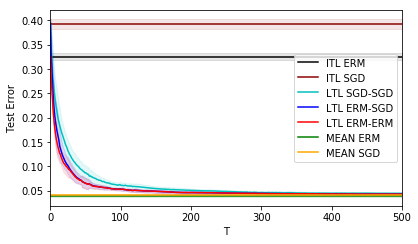

In [59]:
plot_resultsList(T+1, result_dict, y_label, title, save_dir, True, filename=exp+metric+'ERMvsSGD-T'+str(x_right))